In [7]:
import numpy as np

data = {
    'New': {
        'Short-term': [6, 9, 8, 5],
        'Medium-term': [15, 18, 16, 20],
        'Long-term': [10, 12, 9, 13]
    },
    'Old': {
        'Short-term': [10, 11, 5, 9],
        'Medium-term': [9, 12, 13, 9],
        'Long-term': [8, 7, 9, 12]
    }
}

def calculate_stats(numbers):
    mean = np.mean(numbers)
    sd = np.std(numbers, ddof=1)
    return mean, sd

table_of_stats = {}

for therapy, durations in data.items():
    for duration, values in durations.items():
        mean, sd = calculate_stats(values)
        table_of_stats[(therapy, duration)] = {'Mean': mean, 'SD': sd}

for key, stats in table_of_stats.items():
    therapy, duration = key
    print(f"Therapy: {therapy}, Duration: {duration}, Mean: {stats['Mean']:.2f}, SD: {stats['SD']:.2f}")

Therapy: New, Duration: Short-term, Mean: 7.00, SD: 1.83
Therapy: New, Duration: Medium-term, Mean: 17.25, SD: 2.22
Therapy: New, Duration: Long-term, Mean: 11.00, SD: 1.83
Therapy: Old, Duration: Short-term, Mean: 8.75, SD: 2.63
Therapy: Old, Duration: Medium-term, Mean: 10.75, SD: 2.06
Therapy: Old, Duration: Long-term, Mean: 9.00, SD: 2.16


In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = {
    'Score': [6, 9, 8, 5, 10, 11, 5, 9, 15, 18, 16, 20, 9, 12, 13, 9, 10, 12, 9, 13, 8, 7, 9, 12],
    'Therapy': ['New']*12 + ['Old']*12,
    'Duration': ['Short-term']*4 + ['Medium-term']*4 + ['Long-term']*4 + ['Short-term']*4 + ['Medium-term']*4 + ['Long-term']*4
}

df = pd.DataFrame(data)

# Fit the model
model = ols('Score ~ C(Therapy) + C(Duration) + C(Therapy):C(Duration)', data=df).fit()

# Perform the ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)


                         sum_sq    df          F    PR(>F)
C(Therapy)                3.375   1.0   0.738602  0.401410
C(Duration)              79.000   2.0   8.644377  0.002337
C(Therapy):C(Duration)  171.000   2.0  18.711246  0.000040
Residual                 82.250  18.0        NaN       NaN


/var/folders/vs/qzx6m3x17k9_vd5pblwshcym0000gn/T/ipykernel_69443/1071153980.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns_interaction = sns.pointplot(x='Duration', y='Score', hue='Therapy', data=df, ci=None)


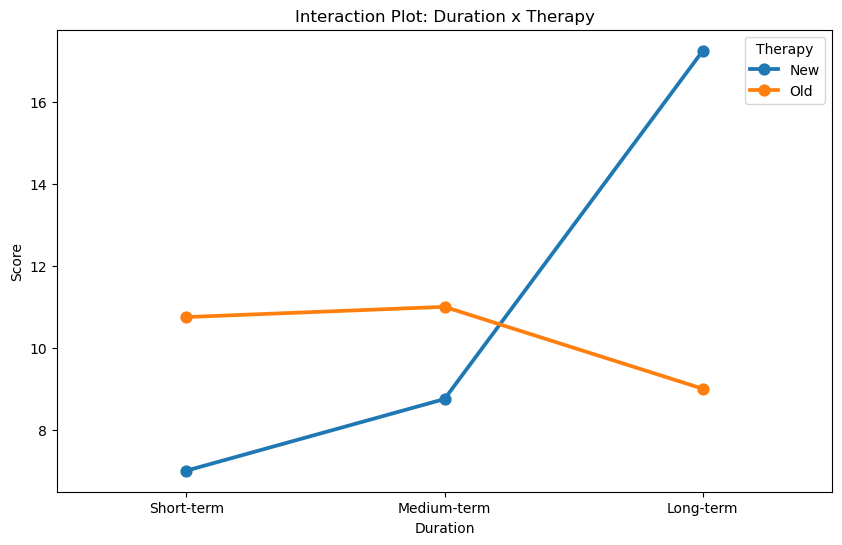

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns_interaction = sns.pointplot(x='Duration', y='Score', hue='Therapy', data=df, ci=None)
sns_interaction.set_title('Interaction Plot: Duration x Therapy')
plt.show()


/var/folders/vs/qzx6m3x17k9_vd5pblwshcym0000gn/T/ipykernel_69443/1147443444.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns_interaction = sns.pointplot(x='Therapy', y='Score', hue='Duration', data=df, ci=None)


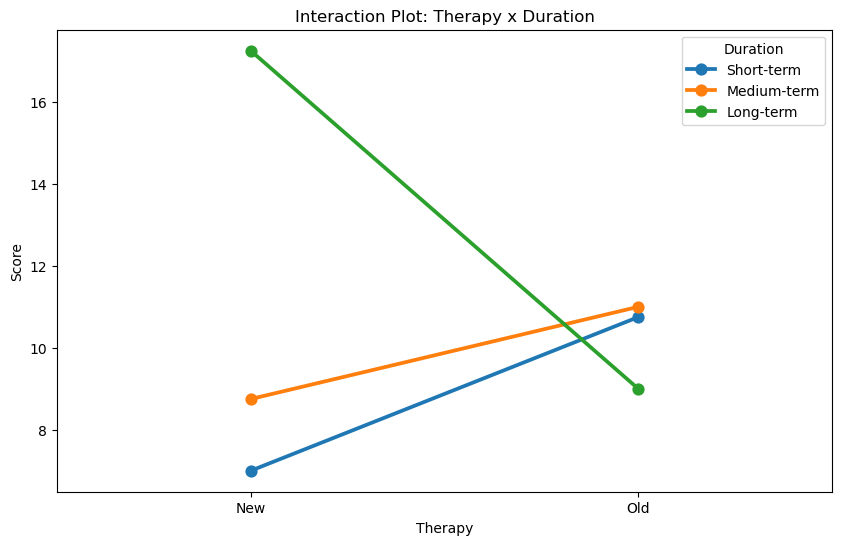

In [9]:
plt.figure(figsize=(10, 6))
sns_interaction = sns.pointplot(x='Therapy', y='Score', hue='Duration', data=df, ci=None)
sns_interaction.set_title('Interaction Plot: Therapy x Duration')
plt.show()


In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# i. Duration at New Therapy (B at A1)
new_therapy_df = df[df['Therapy'] == 'New']

model_new_therapy = ols('Score ~ C(Duration)', data=new_therapy_df).fit()
anova_new_therapy = sm.stats.anova_lm(model_new_therapy, typ=2)
print('ANOVA for Duration within New Therapy group:')
print(anova_new_therapy)

# ii. Therapy at Mid-term (A at B2)
mid_term_df = df[df['Duration'] == 'Medium-term']

model_mid_term = ols('Score ~ C(Therapy)', data=mid_term_df).fit()
anova_mid_term = sm.stats.anova_lm(model_mid_term, typ=2)
print('\nANOVA for Therapy at Mid-term Duration:')
print(anova_mid_term)

# iii. Therapy at Long-term (A at B3)
long_term_df = df[df['Duration'] == 'Long-term']

model_long_term = ols('Score ~ C(Therapy)', data=long_term_df).fit()
anova_long_term = sm.stats.anova_lm(model_long_term, typ=2)
print('\nANOVA for Therapy at Long-term Duration:')
print(anova_long_term)

ANOVA for Duration within New Therapy group:
             sum_sq   df          F    PR(>F)
C(Duration)   240.5  2.0  23.785714  0.000256
Residual       45.5  9.0        NaN       NaN

ANOVA for Therapy at Mid-term Duration:
            sum_sq   df        F    PR(>F)
C(Therapy)  10.125  1.0  1.97561  0.209463
Residual    30.750  6.0      NaN       NaN

ANOVA for Therapy at Long-term Duration:
             sum_sq   df          F    PR(>F)
C(Therapy)  136.125  1.0  28.408696  0.001778
Residual     28.750  6.0        NaN       NaN


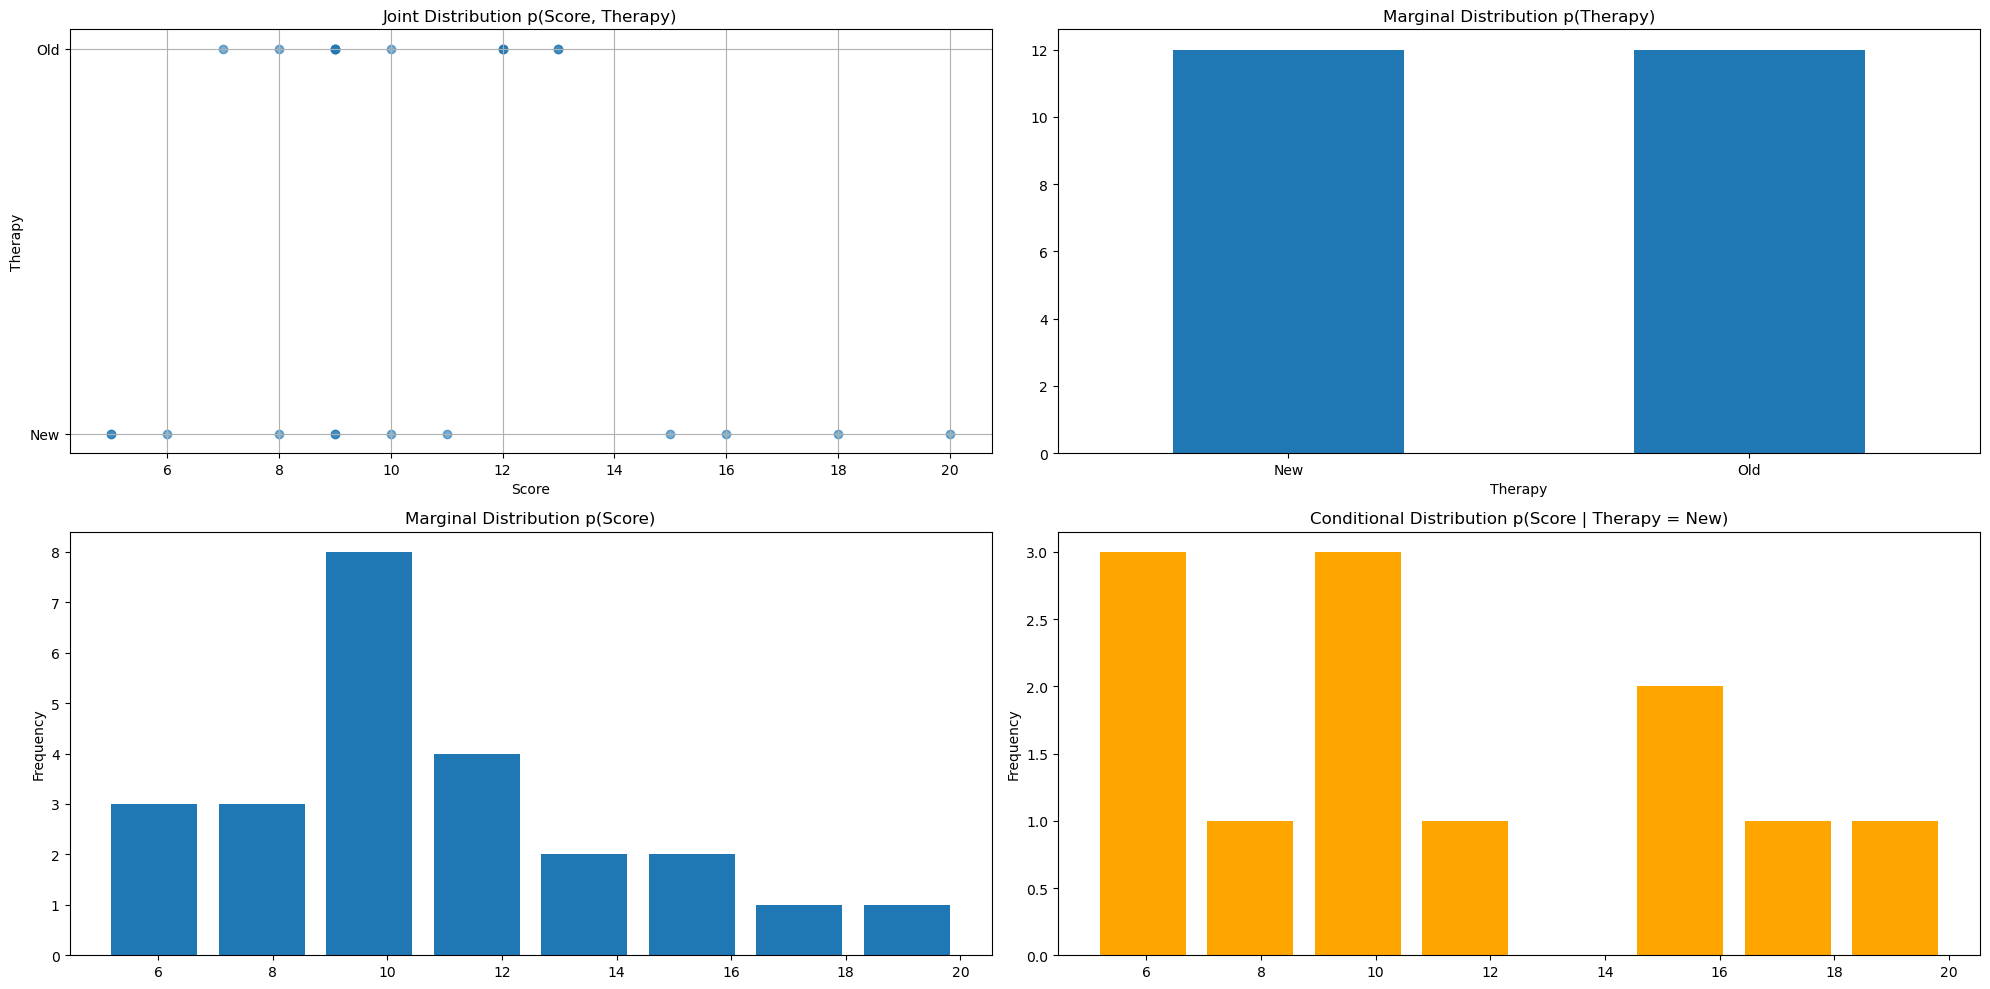

In [11]:
df['Therapy'] = df['Therapy'].map({'New': 1, 'Old': 2})

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.scatter(df['Score'], df['Therapy'], alpha=0.6)
plt.xlabel('Score')
plt.ylabel('Therapy')
plt.title('Joint Distribution p(Score, Therapy)')
plt.yticks([1, 2], ['New', 'Old'])
plt.grid(True)

plt.subplot(2, 2, 2)
df['Therapy'].value_counts().sort_index().plot(kind='bar')
plt.title('Marginal Distribution p(Therapy)')
plt.xticks([0, 1], ['New', 'Old'], rotation=0)

plt.subplot(2, 2, 3)
df['Score'].plot(kind='hist', bins=8, rwidth=0.8)
plt.title('Marginal Distribution p(Score)')

plt.subplot(2, 2, 4)
df[df['Therapy'] == 1]['Score'].plot(kind='hist', bins=8, rwidth=0.8, color='orange')
plt.title('Conditional Distribution p(Score | Therapy = New)')

plt.tight_layout()
plt.show()